# Model Explanations 

We provide feature importance for model explanations.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from xgboost import XGBRegressor
import joblib
from sklearn.inspection import permutation_importance

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Data and Model Import

In [2]:
data = pd.read_csv('data/data.csv')

<ipython-input-2-e9bba6ebf1b5>:1: DtypeWarning: Columns (38) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('data/data.csv')


In [3]:
data['Clim_zone'] = data['Clim_zone'].astype('category')

In [4]:
model_cuhi_d = joblib.load('models/CUHI_day_summer_xgb_estimator.joblib') 
model_cuhi_n = joblib.load('models/CUHI_night_summer_xgb_estimator.joblib')
model_suhi_d = joblib.load('models/SUHI_day_summer_xgb_estimator.joblib') 
model_suhi_n = joblib.load('models/SUHI_night_summer_xgb_estimator.joblib') 

In [5]:
features = ['ESABuilt_Area', 'ESAGrass_Area', 'ESATree_Area', 
            'Albedo_Built', 'Albedo_Grass', 'Albedo_Tree', 
            'DEM_urb_CT_act', 'Clim_zone']
labels = ['CUHI_day_summer', 'CUHI_night_summer', 'SUHI_day_summer', 'SUHI_night_summer']

In [6]:
Xy = data.dropna().copy()[features+labels]

## Permutation Importance

In [7]:
plt.rcParams.update({'font.size': 14})

In [8]:
models = [model_cuhi_d, model_cuhi_n, model_suhi_d, model_suhi_n]
titles = ['CUHI (Day)', 'CUHI (Night)', 'SUHI (Day)', 'SUHI (Night)']
yticks = ['Built Area', 'Grass Area', 'Tree Area', 'Built Albedo', 'Grass Albedo', 'Tree Albedo', 
          'Elevation', 'Climate Zone']

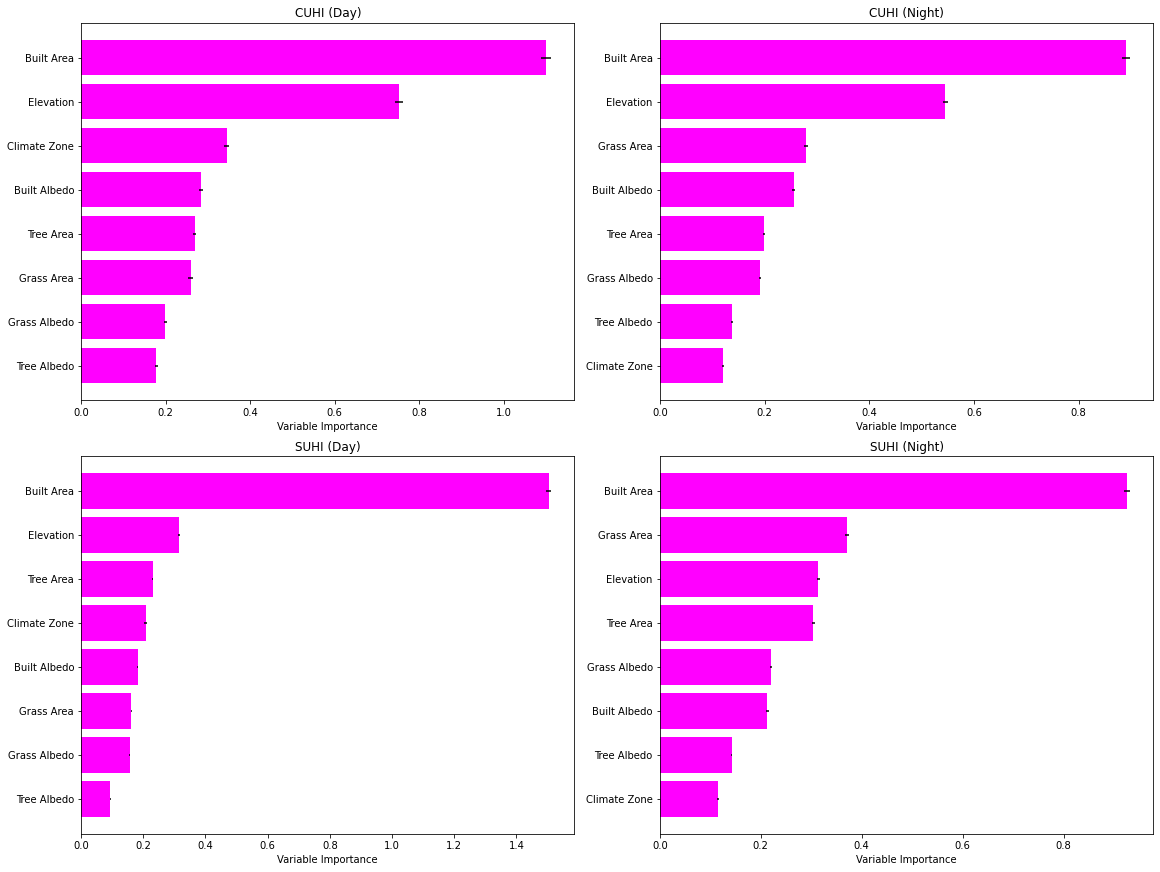

In [9]:
N_REPEATS = 100; nrows = 2; ncols = 2
fig, axes = plt.subplots(nrows=nrows, ncols=ncols,figsize=(16, 12), constrained_layout=True)
for k, ax in enumerate(axes.flatten()):
    y = labels[k]
    result = permutation_importance(models[k], Xy[features], Xy[y], n_repeats=N_REPEATS, 
                                    scoring='explained_variance', random_state=0, n_jobs=2)
    importance_df = pd.DataFrame({
        "feature": yticks,
        "importance_mean": result.importances_mean,
        "importance_std": result.importances_std,
    })
    importance_df = importance_df.sort_values(by='importance_mean', ascending=True)
    ax.barh(importance_df['feature'], importance_df['importance_mean'], 
            xerr=importance_df['importance_std'], align='center', color='magenta')
    ax.set_xlabel("Variable Importance")
    ax.set_title(titles[k])
#plt.suptitle("Permutation Importance", fontsize=18)
plt.savefig('graphs/variable_importance/importance.png', bbox_inches='tight', dpi=720)